In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import kurtosis, skew
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

##### 1. Загрузить файл hr.csv

In [2]:
data_HR = pd.read_csv('HR.csv', sep = ',')
data_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data_HR.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [4]:
data_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data_HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


##### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [6]:
data_HR.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


In [7]:
for param in data_HR.describe().columns:
    print(f'Основные статистики для параметра {param}:')
    print('\tМатематическое ожидание: ', round(statistics.mean(data_HR[param]), 2))
    print('\tСтандартное отклонение: ', round(statistics.pstdev(data_HR[param]), 2))
    print('\tДисперсия: ', round(statistics.pvariance(data_HR[param]), 2))
    print('\tМедиана: ', statistics.median(data_HR[param]))
    try:
        print('\tЗначение моды: ', statistics.mode(data_HR[param]))
    except:
        print('\tНе удалось найти моду')
    print('\tЗначение минимум: ', min(data_HR[param]))
    print('\tЗначение максимум: ', max(data_HR[param]))
    print('\tРазмах: ', round(max(data_HR[param])-min(data_HR[param]), 2))

Основные статистики для параметра satisfaction_level:
	Математическое ожидание:  0.61
	Стандартное отклонение:  0.25
	Дисперсия:  0.06
	Медиана:  0.64
	Значение моды:  0.1
	Значение минимум:  0.09
	Значение максимум:  1.0
	Размах:  0.91
Основные статистики для параметра last_evaluation:
	Математическое ожидание:  0.72
	Стандартное отклонение:  0.17
	Дисперсия:  0.03
	Медиана:  0.72
	Значение моды:  0.55
	Значение минимум:  0.36
	Значение максимум:  1.0
	Размах:  0.64
Основные статистики для параметра number_project:
	Математическое ожидание:  3.8
	Стандартное отклонение:  1.23
	Дисперсия:  1.52
	Медиана:  4
	Значение моды:  4
	Значение минимум:  2
	Значение максимум:  7
	Размах:  5
Основные статистики для параметра average_montly_hours:
	Математическое ожидание:  201.05
	Стандартное отклонение:  49.94
	Дисперсия:  2494.15
	Медиана:  200
	Не удалось найти моду
	Значение минимум:  96
	Значение максимум:  310
	Размах:  214
Основные статистики для параметра time_spend_company:
	Математичес

In [8]:
import pandas_profiling
data_HR.profile_report()

##### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [9]:
cor_mtrx = data_HR.corr()
cor_mtrx

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


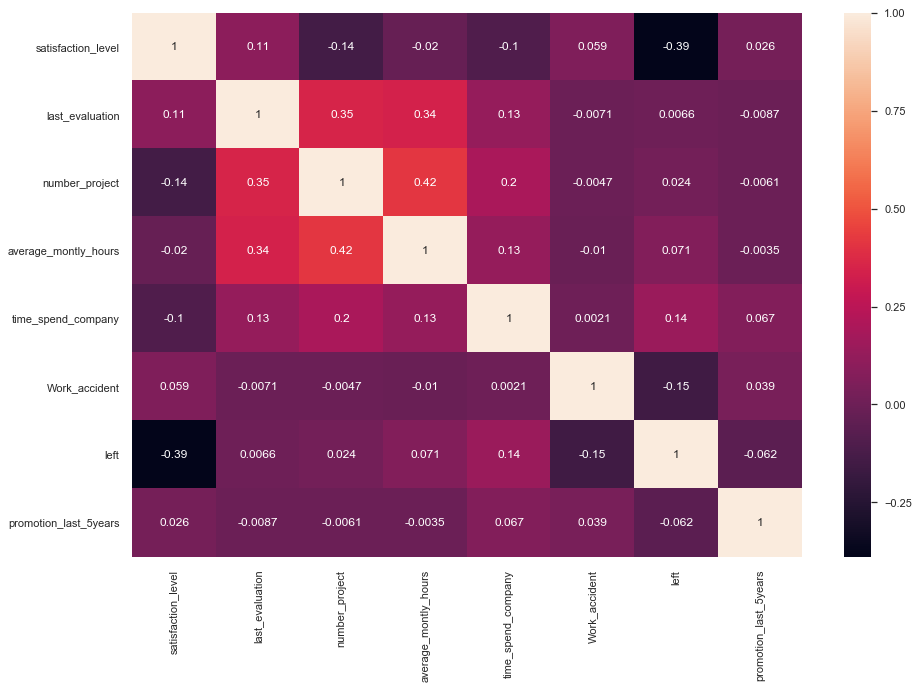

In [128]:
import seaborn as sns
sns.set(rc=({'figure.figsize':(15,10)}))
sns.heatmap(cor_mtrx, annot=True, xticklabels=cor_mtrx.columns.values, yticklabels=cor_mtrx.columns.values)

Заметна преобладающая отрицательная корреляция между уровнем удовлетворенности сотрудника и фактом ухода сотрудника из компании  
Также заметна положительная, хоть и не слишком сильная корреляция между количеством выполняемых проектов сотрудником, последним повышением и средним временем работы в месяц

##### 4.Визуализировать несколько взаимосвязей между переменными.

In [14]:
data_HR.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

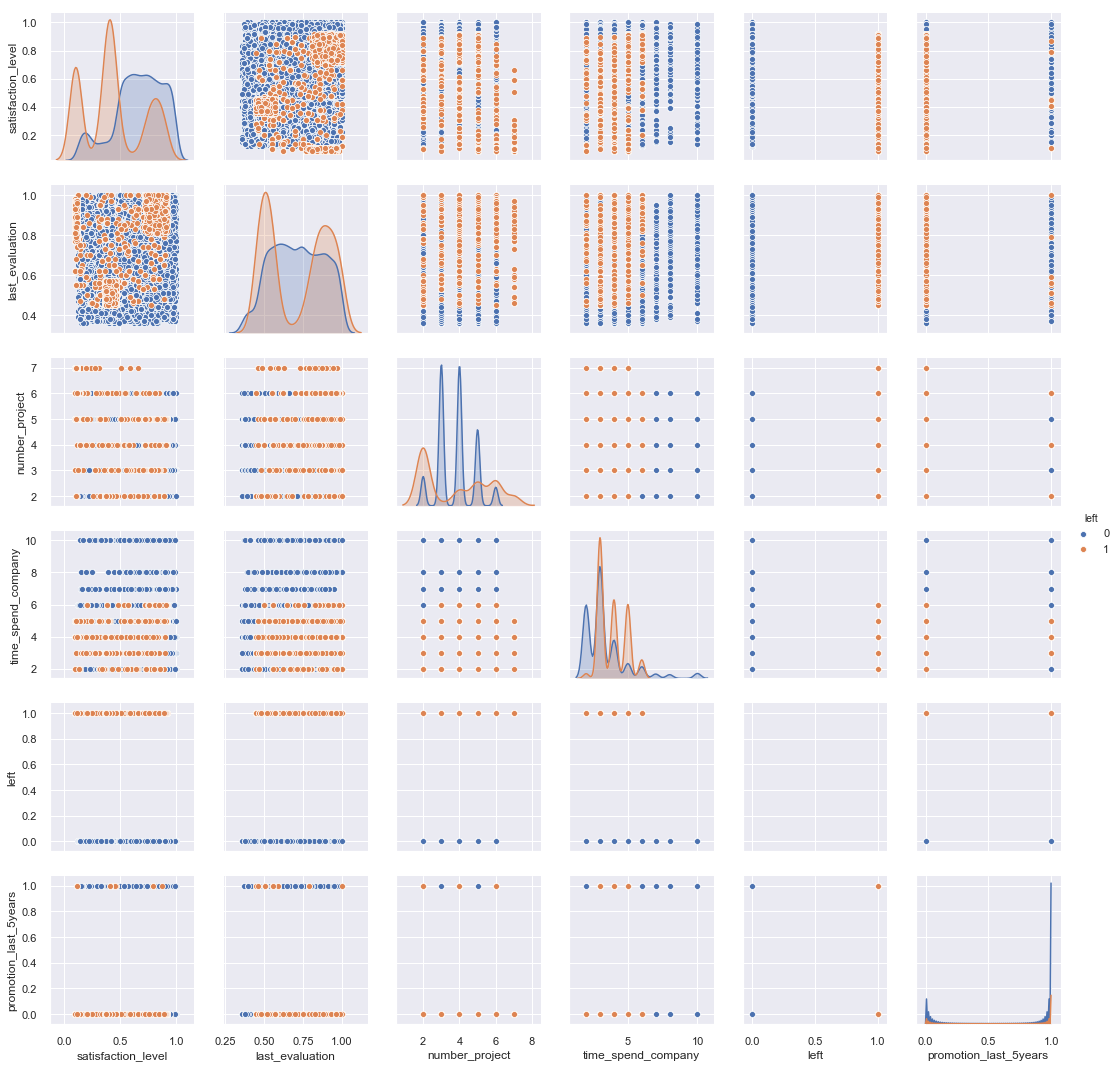

In [129]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project', 
        'time_spend_company', 'left', 'salary', 'promotion_last_5years']
fig = sns.pairplot(data=data_HR[cols], hue='left')
plt.show()

Можно сделать вывод, что сотрудники проработавшие в компании больше 6 лет, не увольняются.  
Так же можно сделать вывод, что нибольшее количество проектов берут на себя сотрудники работавшие в компании до 5 лет и они, как правило, потом увольняются.

##### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

###### предположим, что инциденты на работе не влияют на количество увольнений. Т.е. количество увольнений с инцидентами и без одинаковое

In [18]:
df_no = data_HR.loc[(data_HR['left'] == 0) ]['Work_accident']
df_ye = data_HR.loc[(data_HR['left'] == 1) ]['Work_accident']

In [19]:
df_no = df_no.sample(min(len(df_no), len(df_ye)))
df_ye = df_ye.sample(min(len(df_no), len(df_ye)))
statistics.variance(df_no), statistics.variance(df_ye)

(0.14588056449126838, 0.04509858830118438)

In [20]:
sts.ttest_ind(df_no, df_ye, equal_var=False)

Ttest_indResult(statistic=17.767653422991845, pvalue=9.532401462859385e-69)

значение pvalue очень низкое, значит мы НЕ можем принять нулевую теорию, т.е инциденты на работе не влияют на количество увольнений.

###### предположим, что повышение за последние 5 лет не влияет на уровень удовлетворенности

In [21]:
data_HR.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [22]:
df_no = data_HR.loc[(data_HR['promotion_last_5years'] == 0)]['satisfaction_level']
df_ye = data_HR.loc[(data_HR['promotion_last_5years'] == 1)]['satisfaction_level']

In [23]:
df_no = df_no.sample(min(len(df_no), len(df_ye)))
df_ye = df_ye.sample(min(len(df_no), len(df_ye)))
statistics.variance(df_no), statistics.variance(df_ye)

(0.059265828749433175, 0.045151710336941306)

In [24]:
sts.ttest_ind(df_no, df_ye, equal_var=True)

Ttest_indResult(statistic=-2.839859703365355, pvalue=0.004657610476006319)

значение pvalue ниже 5%, значит мы не можем принять нулевую теорию, что уровень удовлетворенности у тех кто получил повышение и кто не получал повышение - одинаковый. Но это для всех сотрудников. Проверим эту же гипотизу на уволившихся и оставшихся сотрудниках:

###### предположим, что у работающих сотрудников получивших повышение за последние 5 лет и не получивших повышение одинаковый уровень удовлетворенности

In [25]:
df_no = data_HR.loc[(data_HR['promotion_last_5years'] == 0) & (data_HR['left'] == 0)]['satisfaction_level']
df_ye = data_HR.loc[(data_HR['promotion_last_5years'] == 1) & (data_HR['left'] == 0)]['satisfaction_level']

In [26]:
df_no = df_no.sample(min(len(df_no), len(df_ye)))
df_ye = df_ye.sample(min(len(df_no), len(df_ye)))
statistics.variance(df_no), statistics.variance(df_ye)

(0.04728457525083612, 0.042488172798216275)

In [27]:
sts.ttest_ind(df_no, df_ye, equal_var=True)

Ttest_indResult(statistic=-0.18691271551878091, pvalue=0.8517924638842675)

значение pvalue высоке, значит мы можем принять нулевую теорию, что уровень удовлетворенности у тех кто получил повышение и кто не получал повышение - одинаковый, т.е. факт повышения не влияет на уровень удовлетворенности

##### 6.Рассчитать сколько работников работает в каждом департаменте.

In [28]:
count_emp = data_HR.groupby('sales')[['salary']].count().sort_values('salary', ascending=False)
count_emp.columns = ['Количество работников']
count_emp.index.names = ['Департамент']
count_emp.style.bar()

,Количество работников
Департамент,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


##### 7.Показать распределение сотрудников по зарплатам.

In [29]:
def salary_to_numeric(a):
    if a == 'low':
        return 1
    if a == 'medium':
        return 2
    if a == 'high':
        return 3


data_HR2 = data_HR.copy()
data_HR2['salary'] = data_HR2["salary"].apply(salary_to_numeric)

In [130]:
import plotly.graph_objects as go

piv = (data_HR2.groupby('salary')['left'].agg('count'))#.sort_values('sales', ascending=True))
list(piv)

x = ['low', 'medium', 'high']
y = list(piv)
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

fig.show()

##### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [131]:
salary=['low', 'medium', 'high']
sales = data_HR['sales'].unique()
piv2 = (data_HR2.groupby(['sales','salary'])[['left']].agg(['count']).sort_values('sales', ascending=True))

fig2 = go.Figure()
i=0
for sl in piv2.index:
    if i%3 == 0:
        fig2.add_trace(go.Bar(
            x=salary,
            y=list(piv2.query("sales == '{}'".format(sl[0]))['left']['count']),
            name=sl[0],
        ))
    i += 1

    fig2.update_layout(barmode='group')
fig2.show()

##### 9.Сколько сотрудников покинули компанию.

In [32]:
left_count = data_HR[data_HR['left']==1]['left'].sum()
left_per = round(data_HR[data_HR['left']==1]['left'].sum()/data_HR['left'].count()*100, 1)
print('Компанию покинуло {} человек, что составляет {}% от общей численности компании'.format(left_count, left_per))

Компанию покинуло 3571 человек, что составляет 23.8% от общей численности компании


##### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [33]:
data_HR.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

###### посмотрим на матрицу корреляций только для уволившихся сотрудников

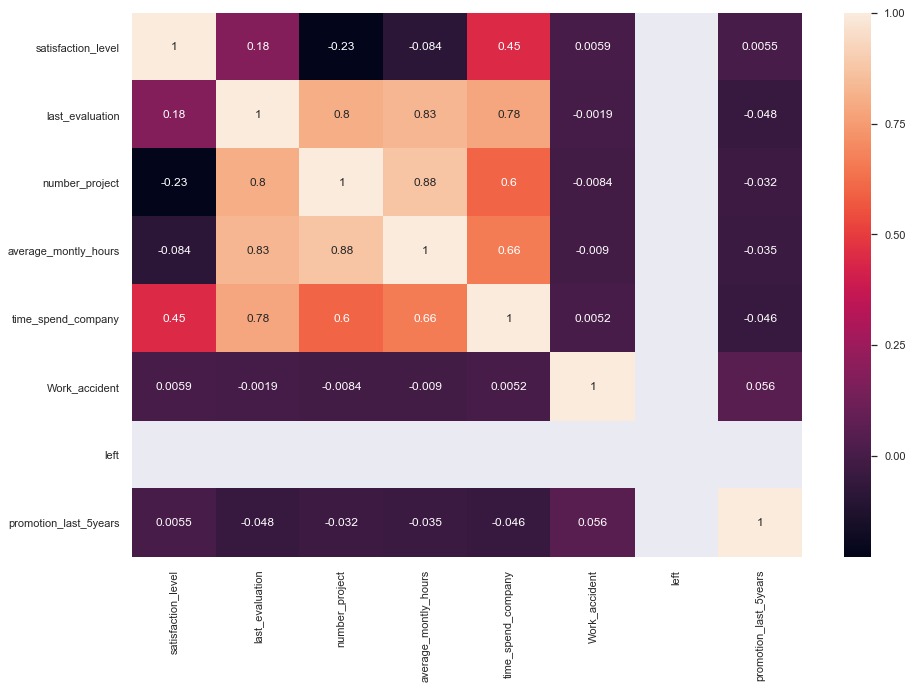

In [132]:
cor_mtrx_left = data_HR[data_HR['left'] == 1].corr()
sns.set(rc=({'figure.figsize':(15,10)}))
sns.heatmap(cor_mtrx_left, annot=True, xticklabels=cor_mtrx_left.columns.values, yticklabels=cor_mtrx_left.columns.values)

По матрице видно, что между собой сильно коррелируют последняя оценка сотрудника, количество проектов, в которых занят сотрудник и среднее время в месяц, которое тратит сотрудник на работу. Проверим ниже некоторые из этих параметров

###### пердположим, что время работы влияет на причину ухода из компании. Посмотрим гистограмму по ушедшими и оставшимися

In [39]:
import scipy.stats as sts
import statistics
hours_stay = data_HR[data_HR['left']==0]['average_montly_hours']
hours_left = data_HR[data_HR['left']==1]['average_montly_hours']
sts.ttest_ind(hours_stay, hours_left)


Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)

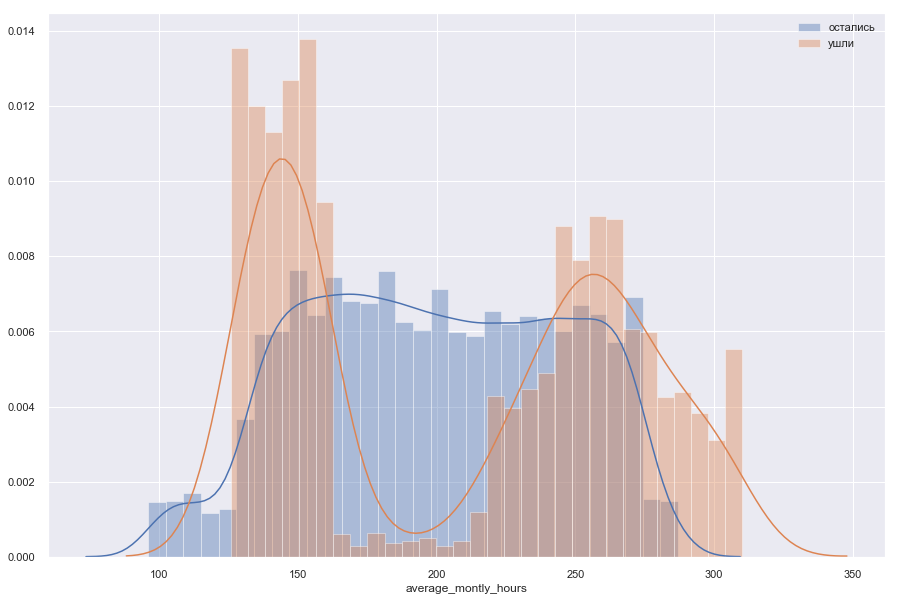

In [133]:
sns.distplot(hours_stay, bins=30)
sns.distplot(hours_left, bins=30)
plt.legend(['остались', 'ушли'])
plt.show()

По диаграмме можно сделать вывод, что те работает больше 130 и меньше 160 часов в месяц - в зоне риска, также как и те, кто работает больше 240 часов в месяц. Те **кто работал свыше 280 часов в месяц гарантированно покинул компанию**.

###### посмотрим как последняя оценка влияет на причину ухода из компании. Посмотрим гистограмму по ушедшими и оставшимися

In [51]:
eval_stay = data_HR[data_HR['left']==0]['last_evaluation']
eval_left = data_HR[data_HR['left']==1]['last_evaluation']
sts.ttest_ind(eval_stay, eval_left)


Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)

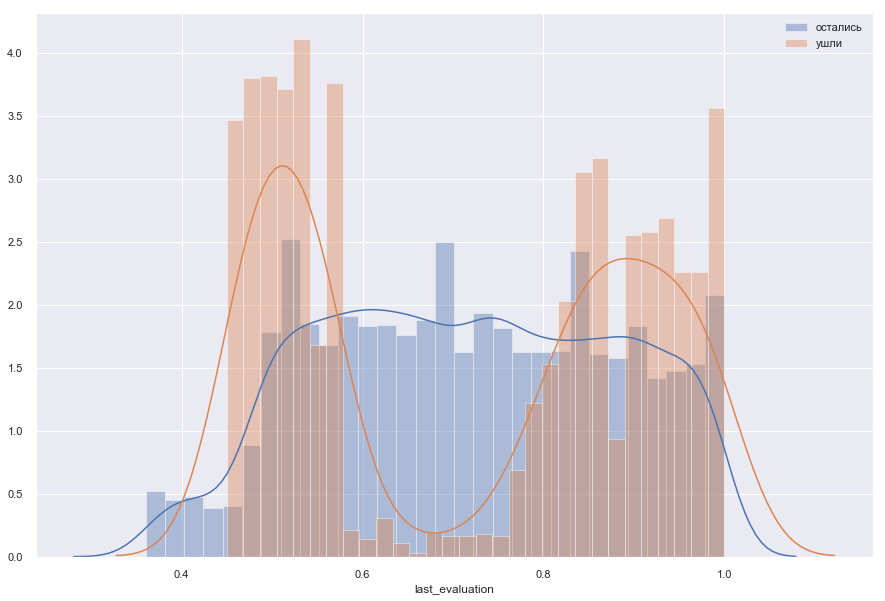

In [134]:
sns.distplot(eval_stay, bins=30)
sns.distplot(eval_left, bins=30)
plt.legend(['остались', 'ушли'])
plt.show()

сотрудники, которые ушли, получают более низкую или более высокую последнюю оценку. Но здесь нельзя сделать однозначное утверждение влияния поставленной оценки на уход сотрудника.   

###### Очевидно, что уровень удовлетворения должен сильнее всего влиять на причину ухода из компании. Посмотрим это на гистограмме

In [79]:
satlevel_stay = data_HR[data_HR['left']==0]['satisfaction_level']
satlevel_left = data_HR[data_HR['left']==1]['satisfaction_level']
sts.ttest_ind(satlevel_stay, satlevel_left)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

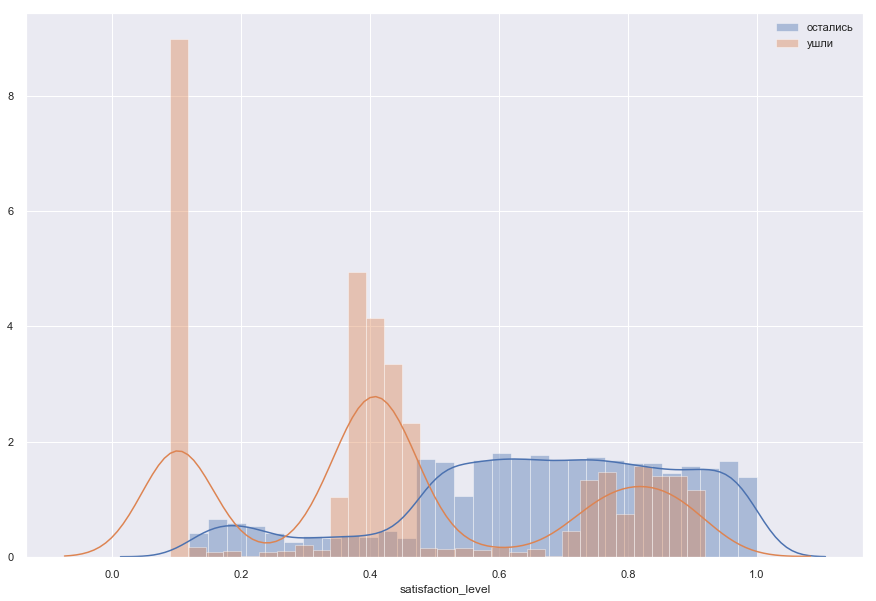

In [135]:
sns.distplot(satlevel_stay, bins=30)
sns.distplot(satlevel_left, bins=30)
plt.legend(['остались', 'ушли'])
plt.show()

Уровень удовлетворенности 2/3 ушедших сотрудников сотрудников составляет менее 50%

In [123]:
input_x = data_HR.loc[:, (data_HR.columns != 'left') & (data_HR.columns != 'sales') & (data_HR.columns != 'salary')]
Y = data_HR.loc[:, data_HR.columns == 'left']

In [124]:
from sklearn.model_selection import train_test_split
X_train_27, X_test_27, y_train_27, y_test_27 = train_test_split(input_x, Y, test_size=0.3)

No handles with labels found to put in legend.


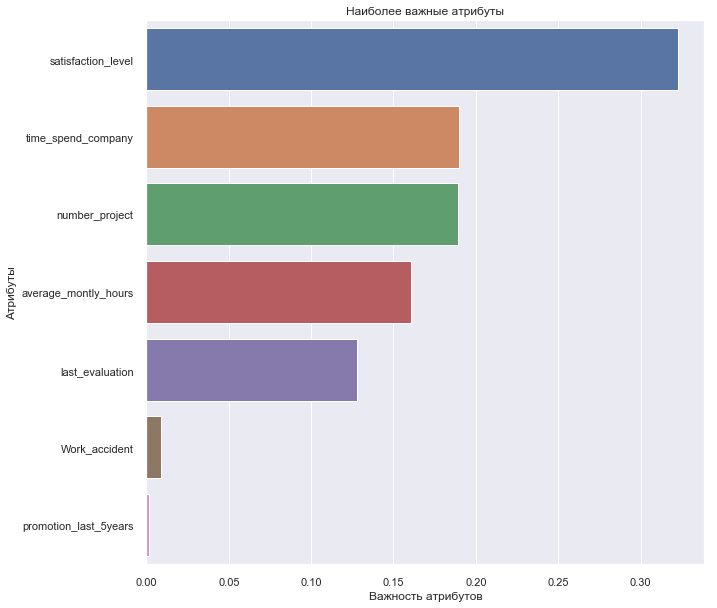

In [136]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_27,y_train_27)

headers = list(X_train_27.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Таким образом, наиболее важным параметром при решение об уходе из компании является уровень удовлетворенности, о чем и говорилось выше.